In [50]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%autoreload
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '../')
from constants import *
from utilities_catboost import *
from utilities import *

In [77]:
hyperparameters = {
    'iterations': 250,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 25,
    'border_count': 32,
    'bagging_temperature': 1,
    'random_strength': 1
}


In [78]:
selected_features_a = selected_features.copy()
hyperparameters_a = hyperparameters
wanted_months_a = wanted_months

In [79]:
X_train_a_prep = prepare_X(X_observed_a, X_estimated_a, selected_features_a, wanted_months_a)
X_train_a, y_train_a = resize_training_data(X_train_a_prep, y_a)
X_test_a_prep = prepare_testdata_rf_a(X_test_a, selected_features_a)

In [80]:
catboost_a = catboost_model(hyperparameters_a, X_train_a, X_test_a_prep, y_train_a)

In [81]:
catboost_a_cross_val_predictions,catboost_a_cross_val_actuals, catboost_a_cross_val_mae_mean = catboost_a.cross_val_stack(X_train_a, y_train_a)

In [82]:
catboost_a.cross_validate(X_train_a, y_train_a)

0:	learn: 1213.8156835	total: 6.67ms	remaining: 1.66s
0:	learn: 1238.5369917	total: 8.3ms	remaining: 2.07s
1:	learn: 1123.5473727	total: 12.7ms	remaining: 1.58s
1:	learn: 1144.5134568	total: 14.3ms	remaining: 1.77s
0:	learn: 1178.6289583	total: 17ms	remaining: 4.24s
2:	learn: 1044.8864404	total: 19.3ms	remaining: 1.59s
0:	learn: 1205.1287298	total: 8.56ms	remaining: 2.13s
2:	learn: 1061.8830686	total: 19.6ms	remaining: 1.61s
1:	learn: 1092.4288728	total: 21.6ms	remaining: 2.68s
3:	learn: 975.1396317	total: 26.8ms	remaining: 1.65s
0:	learn: 1277.4822265	total: 6.04ms	remaining: 1.5s
1:	learn: 1115.9809732	total: 17.8ms	remaining: 2.21s
3:	learn: 989.2572282	total: 27.6ms	remaining: 1.7s
4:	learn: 913.0906478	total: 31.1ms	remaining: 1.52s
2:	learn: 1016.4543774	total: 30.9ms	remaining: 2.54s
1:	learn: 1181.6125092	total: 10.8ms	remaining: 1.34s
2:	learn: 1038.1280817	total: 21.8ms	remaining: 1.79s
4:	learn: 923.5996209	total: 32.2ms	remaining: 1.58s
5:	learn: 856.2774202	total: 35.9ms	r

0:	learn: 1224.1580038	total: 4.27ms	remaining: 1.71s
1:	learn: 1132.8160320	total: 6.82ms	remaining: 1.36s
2:	learn: 1052.6941052	total: 10.2ms	remaining: 1.35s
3:	learn: 982.1730304	total: 12.5ms	remaining: 1.24s
4:	learn: 918.7156266	total: 14.9ms	remaining: 1.18s
5:	learn: 863.0848161	total: 19.9ms	remaining: 1.31s
6:	learn: 814.9319555	total: 26.2ms	remaining: 1.47s
7:	learn: 772.4665702	total: 29.5ms	remaining: 1.45s
8:	learn: 736.3167018	total: 31.8ms	remaining: 1.38s
9:	learn: 705.1659542	total: 34.2ms	remaining: 1.33s
10:	learn: 677.9044960	total: 36.2ms	remaining: 1.28s
11:	learn: 653.4698326	total: 38.1ms	remaining: 1.23s
12:	learn: 632.1398751	total: 40ms	remaining: 1.19s
13:	learn: 614.3914235	total: 42.5ms	remaining: 1.17s
14:	learn: 599.2022406	total: 44.7ms	remaining: 1.15s
15:	learn: 585.9718099	total: 46.4ms	remaining: 1.11s
16:	learn: 574.5832210	total: 48.3ms	remaining: 1.09s
17:	learn: 564.7815351	total: 50.2ms	remaining: 1.06s
18:	learn: 556.8579150	total: 51.9ms	

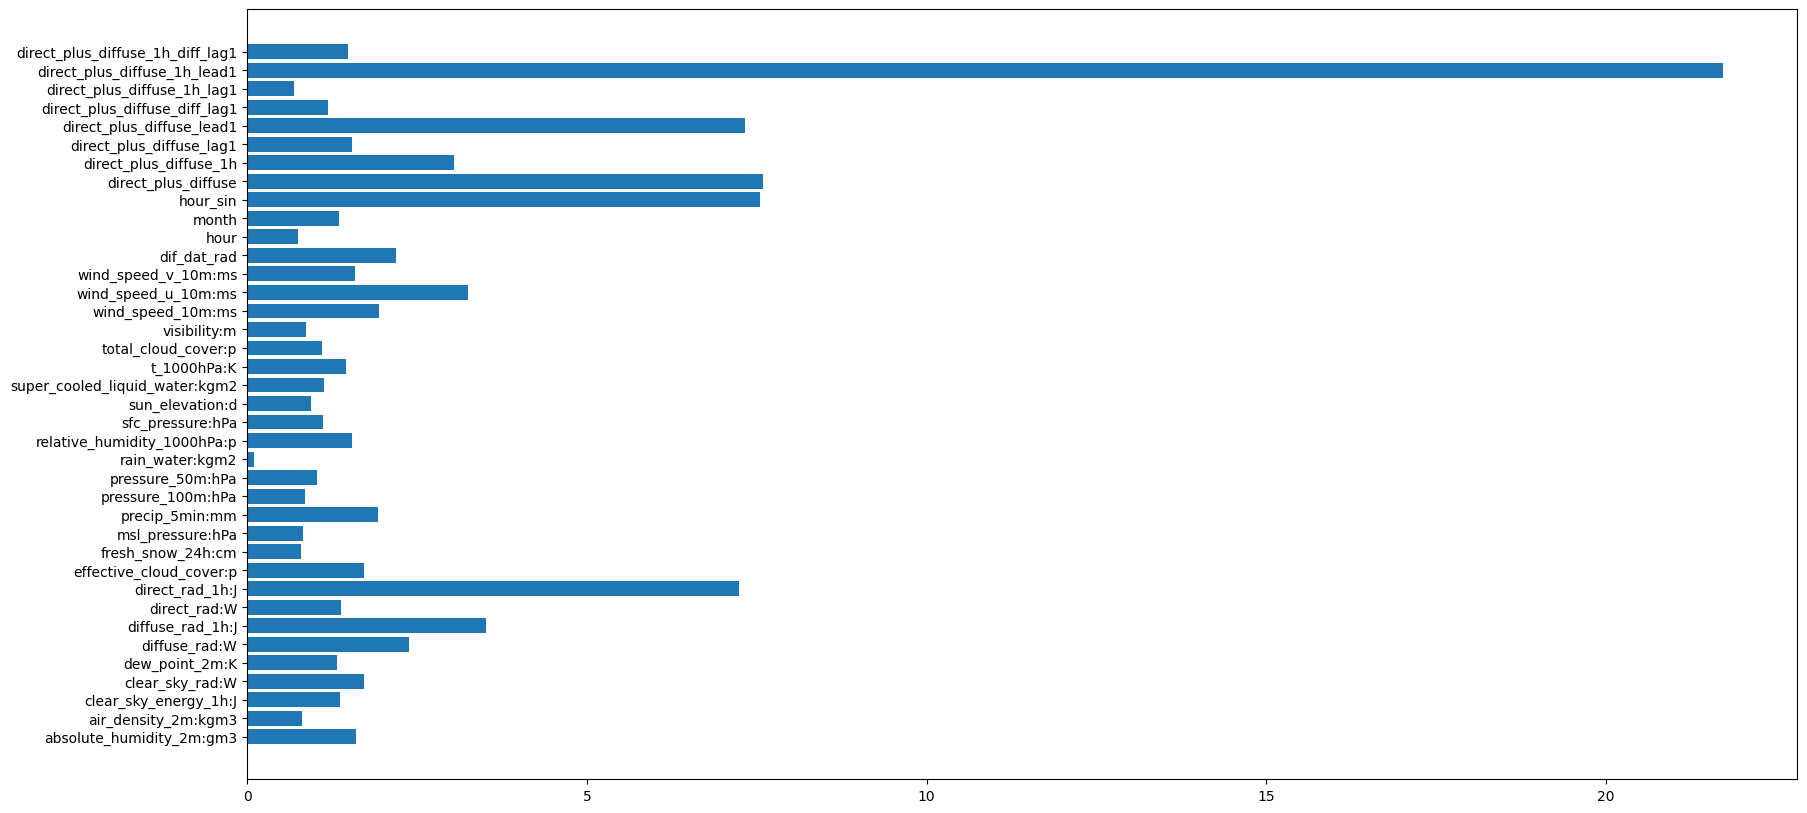

In [58]:
catboost_a.fit()
catboost_a.pred()
catboost_a_test_pred = catboost_a.prediction
catboost_a.feature_importence_plot()

# Dataset B

In [83]:
selected_features_b = selected_features.copy()
hyperparameters_b = hyperparameters
wanted_months_b = wanted_months

In [191]:
hyperparameters_b = {
    'iterations': 80,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 25,
    'border_count': 32,
    'bagging_temperature': 1,
    'random_strength': 1
}

In [192]:
X_train_b_prep = prepare_X(X_observed_b.copy(), X_estimated_b.copy(), selected_features_b, wanted_months_b)
X_train_b, y_train_b = resize_training_data(X_train_b_prep, y_b)
X_test_b_prep = prepare_testdata_rf_a(X_test_b, selected_features_b)

In [193]:
catboost_b = catboost_model(hyperparameters_b, X_train_b, X_test_b_prep, y_train_b)

In [194]:
catboost_b_cross_val_predictions,catboost_b_cross_val_actuals, catboost_b_cross_val_mae_mean = catboost_b.cross_val_stack(X_train_b, y_train_b)

In [195]:
catboost_b.cross_validate(X_train_b, y_train_b)

0:	learn: 234.2727667	total: 2.21ms	remaining: 175ms
1:	learn: 216.3465018	total: 5.47ms	remaining: 213ms
0:	learn: 222.2851403	total: 3.39ms	remaining: 268ms
2:	learn: 200.3327881	total: 10.8ms	remaining: 277ms
0:	learn: 216.5303493	total: 2.94ms	remaining: 232ms
1:	learn: 205.2203756	total: 9.73ms	remaining: 380ms
1:	learn: 200.2318037	total: 5.94ms	remaining: 232ms
3:	learn: 185.8042581	total: 15.1ms	remaining: 287ms
2:	learn: 189.9850375	total: 13.1ms	remaining: 336ms
2:	learn: 185.7957732	total: 9.11ms	remaining: 234ms
3:	learn: 176.9331440	total: 16.5ms	remaining: 313ms
4:	learn: 172.6908410	total: 19.3ms	remaining: 289ms
3:	learn: 173.0342344	total: 12.5ms	remaining: 237ms
4:	learn: 164.8738615	total: 20ms	remaining: 300ms
0:	learn: 231.8875675	total: 3.23ms	remaining: 255ms
4:	learn: 161.0953774	total: 15.9ms	remaining: 238ms
5:	learn: 153.9289818	total: 23.2ms	remaining: 286ms
1:	learn: 213.9973538	total: 6.28ms	remaining: 245ms
5:	learn: 161.4257566	total: 26.7ms	remaining: 3

0:	learn: 229.8765726	total: 2.55ms	remaining: 201ms
1:	learn: 212.1991968	total: 4.62ms	remaining: 180ms
2:	learn: 196.6123857	total: 6.73ms	remaining: 173ms
3:	learn: 182.7557145	total: 9.25ms	remaining: 176ms
4:	learn: 170.0915427	total: 12.1ms	remaining: 181ms
5:	learn: 158.9752801	total: 14.7ms	remaining: 181ms
6:	learn: 149.1852814	total: 16.7ms	remaining: 174ms
7:	learn: 140.8157370	total: 18.4ms	remaining: 166ms
8:	learn: 133.3491779	total: 19.9ms	remaining: 157ms
9:	learn: 126.8247836	total: 22.2ms	remaining: 156ms
10:	learn: 120.9165166	total: 24.2ms	remaining: 152ms
11:	learn: 116.0194126	total: 25.8ms	remaining: 146ms
12:	learn: 111.5751329	total: 27.4ms	remaining: 141ms
13:	learn: 107.8375840	total: 29.4ms	remaining: 139ms
14:	learn: 104.6683662	total: 31.1ms	remaining: 135ms
15:	learn: 101.8796164	total: 32.6ms	remaining: 131ms
16:	learn: 99.3815745	total: 34.1ms	remaining: 126ms
17:	learn: 97.3405282	total: 35.5ms	remaining: 122ms
18:	learn: 95.6182282	total: 36.9ms	rema

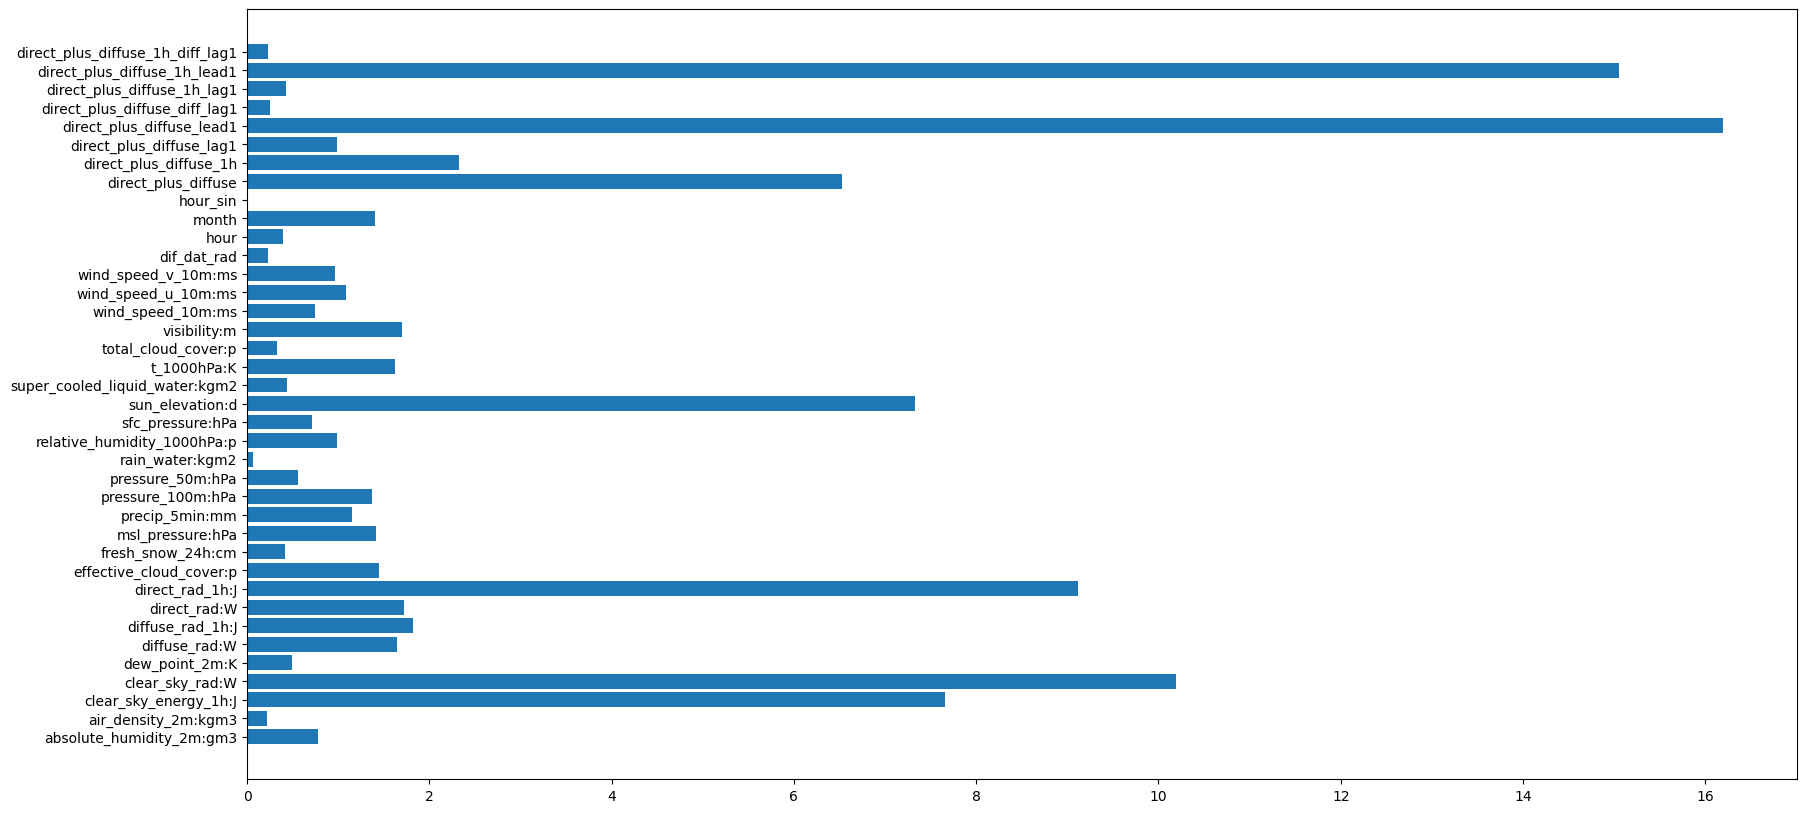

In [196]:
catboost_b.fit()
catboost_b.pred()
catboost_b_test_pred = catboost_b.prediction
catboost_b.feature_importence_plot()

# Dataset C

In [203]:
selected_features_c = selected_features.copy()
hyperparameters_c = hyperparameters
wanted_months_c = wanted_months

In [227]:
hyperparameters_c = {
    'iterations': 80,
    'learning_rate': 0.1,
    'depth': 6,
    'l2_leaf_reg': 25,
    'border_count': 32,
    'bagging_temperature': 1,
    'random_strength': 1
}

In [228]:
X_train_c_prep = prepare_X(X_observed_c, X_estimated_c, selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c_prep, y_c)
X_test_c_prep = prepare_testdata_rf_a(X_test_c, selected_features_c)

In [229]:
catboost_c = catboost_model(hyperparameters_c, X_train_c, X_test_c_prep, y_train_c)

In [230]:
catboost_c_cross_val_predictions,catboost_c_cross_val_actuals, catboost_c_cross_val_mae_mean = catboost_c.cross_val_stack(X_train_c, y_train_c)

In [231]:
catboost_c.cross_validate(X_train_c, y_train_c)

0:	learn: 186.1397587	total: 2.42ms	remaining: 167ms
1:	learn: 172.1309770	total: 5ms	remaining: 170ms
2:	learn: 159.2354148	total: 9.56ms	remaining: 214ms
3:	learn: 148.0847084	total: 13.7ms	remaining: 226ms
0:	learn: 183.1066102	total: 12.8ms	remaining: 882ms
4:	learn: 138.0894444	total: 17.3ms	remaining: 225ms
5:	learn: 128.9301011	total: 20.3ms	remaining: 216ms
1:	learn: 169.5197261	total: 18.9ms	remaining: 641ms
0:	learn: 178.1038788	total: 6.52ms	remaining: 450ms
2:	learn: 157.3254830	total: 22.1ms	remaining: 493ms
6:	learn: 120.9109997	total: 25.5ms	remaining: 230ms
1:	learn: 165.2287878	total: 11.1ms	remaining: 378ms
0:	learn: 192.7713001	total: 5.07ms	remaining: 350ms
7:	learn: 114.1763783	total: 28.5ms	remaining: 221ms
0:	learn: 199.3150728	total: 3.28ms	remaining: 226ms
2:	learn: 153.1393512	total: 14.8ms	remaining: 331ms
3:	learn: 146.8477676	total: 28.7ms	remaining: 474ms
8:	learn: 108.1636144	total: 31.6ms	remaining: 214ms
1:	learn: 178.3287635	total: 9.68ms	remaining: 32

In [232]:
catboost_c.fit()
catboost_c.pred()
catboost_c_test_pred = catboost_c.prediction

0:	learn: 188.2045343	total: 4.08ms	remaining: 282ms
1:	learn: 174.4316743	total: 6.08ms	remaining: 207ms
2:	learn: 161.6614753	total: 7.94ms	remaining: 177ms
3:	learn: 150.7709075	total: 10.7ms	remaining: 176ms
4:	learn: 140.7672326	total: 13.3ms	remaining: 174ms
5:	learn: 131.6939289	total: 15.5ms	remaining: 165ms
6:	learn: 123.7635370	total: 18.6ms	remaining: 167ms
7:	learn: 117.2077403	total: 21.9ms	remaining: 170ms
8:	learn: 111.0138517	total: 23.5ms	remaining: 159ms
9:	learn: 105.7085649	total: 25.4ms	remaining: 153ms
10:	learn: 100.8712464	total: 27ms	remaining: 145ms
11:	learn: 96.6976999	total: 28.4ms	remaining: 137ms
12:	learn: 93.1167934	total: 29.7ms	remaining: 130ms
13:	learn: 89.9102804	total: 31.3ms	remaining: 125ms
14:	learn: 87.2084788	total: 32.7ms	remaining: 120ms
15:	learn: 84.7211038	total: 34ms	remaining: 115ms
16:	learn: 82.5491333	total: 35.3ms	remaining: 110ms
17:	learn: 80.7799521	total: 36.9ms	remaining: 107ms
18:	learn: 79.3503757	total: 38.2ms	remaining: 10